# UDEMY EDA

    In this notebook , I reviewed the Udemy data , to see if I needed ,
    transformations , cleaning or fixing some values ​​or columns in the provided data ,
    and reach conclusions to present in my dashboard

# 1 Importing needed libraries

In [1]:
# IMPORTAMOS LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np
import re
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud
from langdetect import detect


# 2 Loading the data from the csv file

In [2]:
df_udemy = pd.read_csv(r'Udemy\udemy.csv')

# 3 Looking the structure of my data

In [3]:
df_udemy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
 12  language             3678 non-null   object 
 13  rating               3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 377.3+ KB


# 4 Deleting unused columns

In [4]:
df_udemy = df_udemy.drop('url', axis= 1)

# 5 Finding duplicates in our data

In [5]:
df_udemy.duplicated().sum()


6

# 6 Deleting the duplicated values

In [6]:
df_udemy = df_udemy.drop_duplicates()

# Reseting Indexes in our dataframe

In [7]:
df_udemy = df_udemy.reset_index(drop=True)

# 7 Looking if we have null data

In [8]:
df_udemy.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
language               0
rating                 0
dtype: int64

# 8 Transform the type of the published_timestamp column into datetime type

In [9]:
df_udemy['published_timestamp'] = pd.to_datetime(df_udemy['published_timestamp'])

# 9 Changing the values in column is_paid

In [10]:
df_udemy['is_paid'] = df_udemy['is_paid'].replace(True, "Paid")
df_udemy['is_paid'] = df_udemy['is_paid'].replace(False, "Free")

# 10 Display a graphic to look quantity of free and paid courses

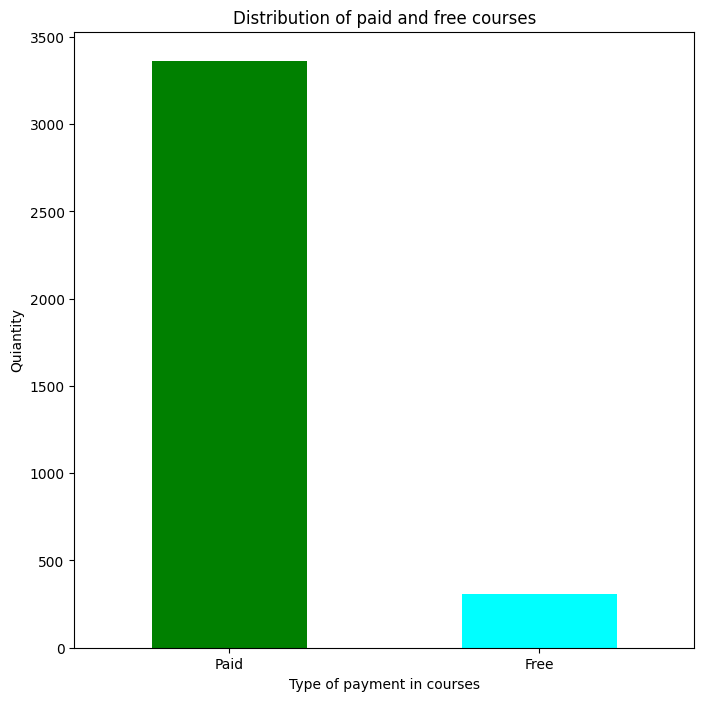

In [11]:
colors = ['Green', 'Cyan']

plt.figure(figsize=(8,8))
ax = df_udemy['is_paid'].value_counts().plot(kind='bar', color = colors)
ax.set_xticklabels(['Paid', 'Free'], rotation=0)  # Rotating labels in axis X
plt.title('Distribution of paid and free courses')
plt.xlabel('Type of payment in courses')
plt.ylabel('Quiantity')
plt.show()

    Conclusion: we can see that most of the courses are paid

# 11 Changing some values in the level column

In [12]:
df_udemy['level'] = df_udemy['level'].replace("Beginner Level", "Beginner")
df_udemy['level'] = df_udemy['level'].replace("Intermediate Level", "Intermediate")
df_udemy['level'] = df_udemy['level'].replace("Expert Level", "Expert")

# 12 Displaying a graphic to look quiantity of courses per level

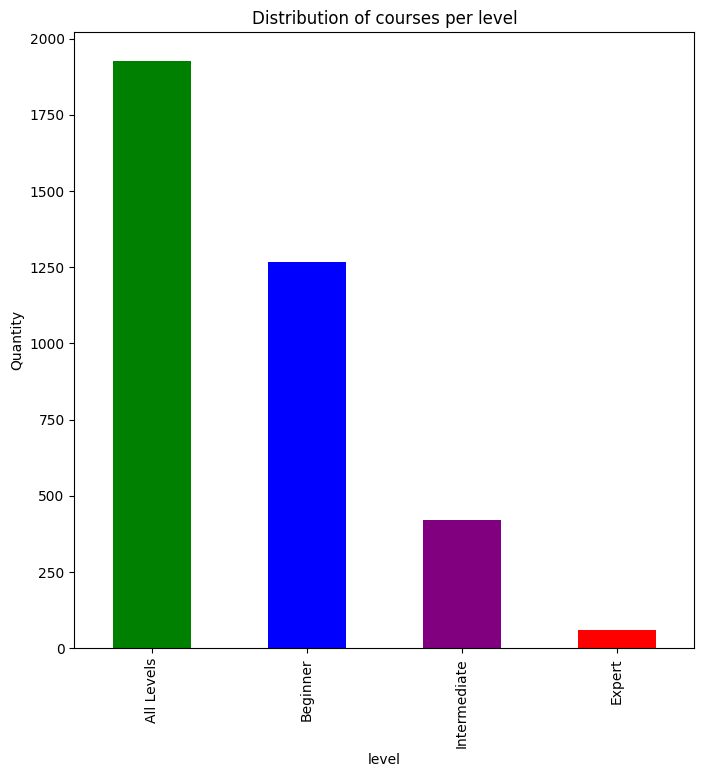

In [13]:
colors = ['Green', 'Blue' , 'Purple'  ,'Red']

plt.figure(figsize=(8,8))
df_udemy['level'].value_counts().plot(kind='bar', color= colors)
plt.title('Distribution of courses per level')
plt.xlabel('level')
plt.ylabel('Quantity')
plt.show()

    Conclusion: The courses for All levels are most likely to be suscribed to

# 13 Displaying a graphic to look quiantity of courses per subject

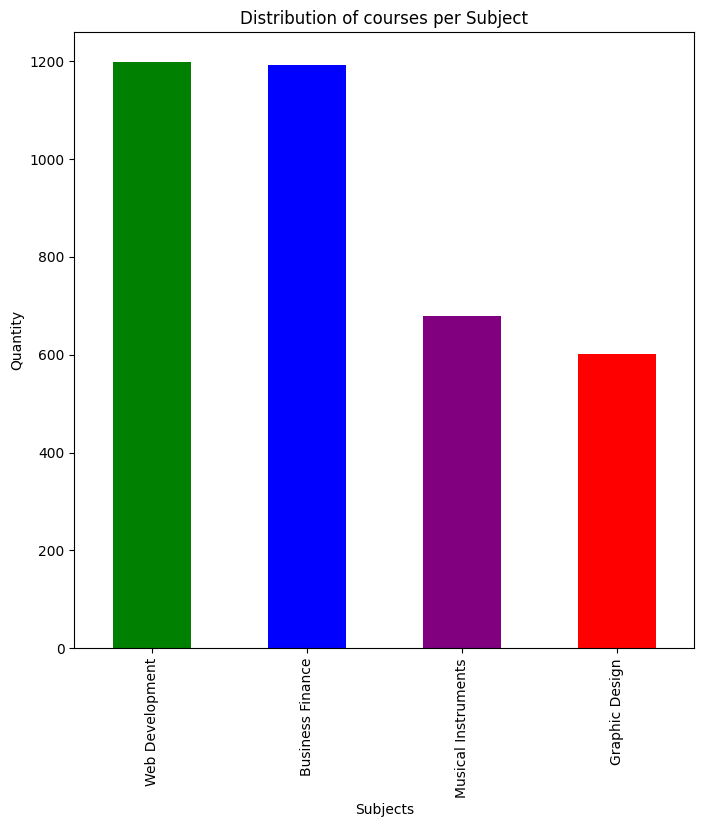

In [14]:
colors = ['Green', 'Blue' , 'Purple'  ,'Red']

plt.figure(figsize=(8,8))
df_udemy['subject'].value_counts().plot(kind='bar', color= colors)
plt.title('Distribution of courses per Subject')
plt.xlabel('Subjects')
plt.ylabel('Quantity')
plt.show()

    Conclusion: We can relate that Web Development and Business Finance are more popular

# 14 Finding the relations between numeric columns

In [15]:
df_udemy_numeric = df_udemy.select_dtypes(include=['int64', 'float64'])

In [16]:
df_udemy_numeric.corr()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,0.143062,-0.166094,-0.058310,-0.024735,-0.057236
price,0.143062,1.000000,0.050436,0.113568,0.329944,0.293200
num_subscribers,-0.166094,0.050436,1.000000,0.651070,0.158351,0.162118
num_reviews,-0.058310,0.113568,0.651070,1.000000,0.243019,0.228852
num_lectures,-0.024735,0.329944,0.158351,0.243019,1.000000,0.801624
content_duration,-0.057236,0.293200,0.162118,0.228852,0.801624,1.000000


# 15 Making a heatmap to visualise the correlation

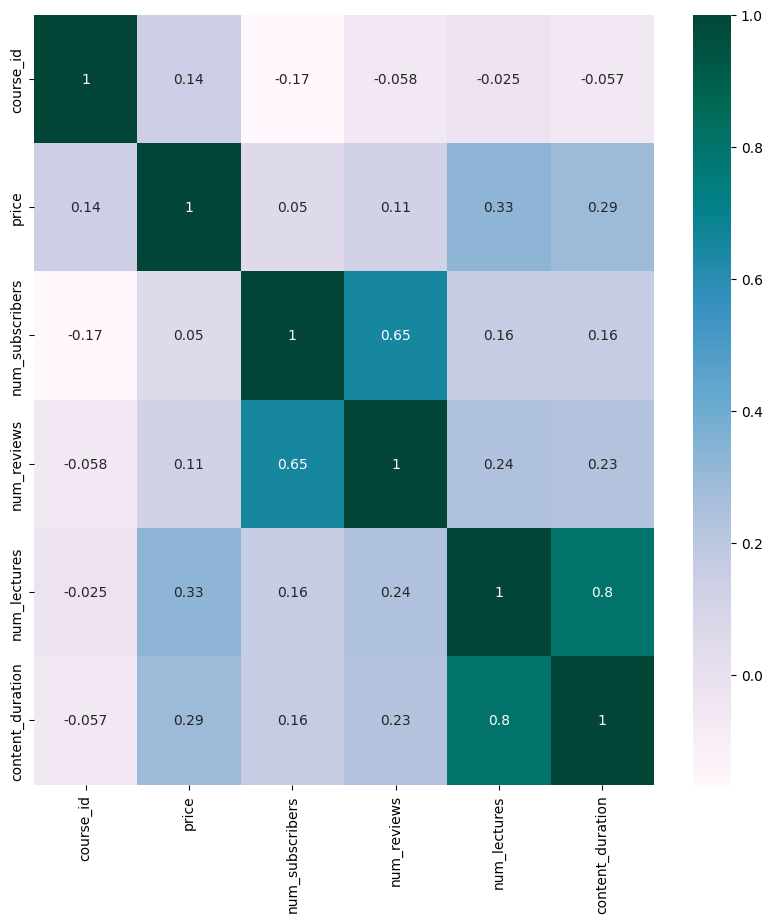

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df_udemy_numeric.corr(), annot=True, cmap='PuBuGn')
plt.show()

# 16 Displaying a graph to look how suscribers distribution by price

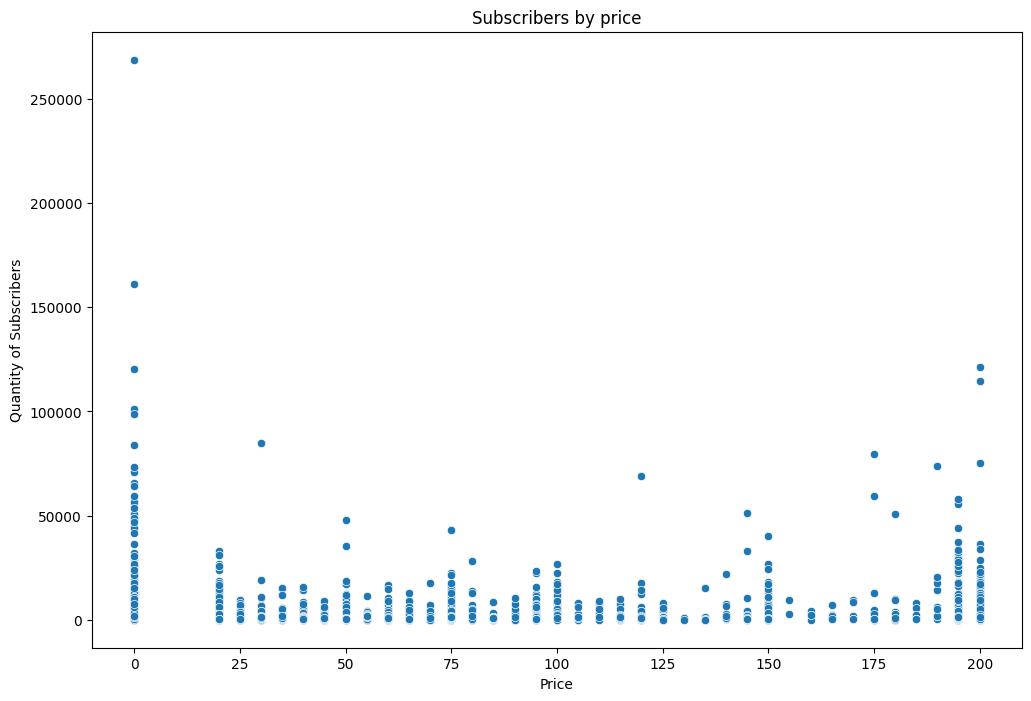

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_udemy, x='price', y='num_subscribers')
plt.title('Subscribers by price')
plt.xlabel('Price')
plt.ylabel('Quantity of Subscribers')
plt.show()

# 17 Displaying how the course prices are distributed

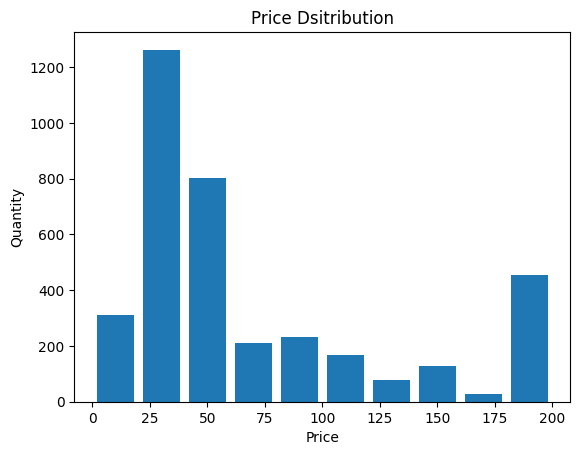

In [19]:
df_udemy['price'].plot(kind='hist', rwidth=0.8)
plt.title('Price Dsitribution')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

    Conclusion: We can look that more then 50% of the courses are avaible in a range between 25$ and 50$

# 18 Fixing some values in rating column

In [20]:
df_udemy['rating'] = df_udemy['rating'].astype(str)
df_udemy['rating'] = df_udemy['rating'].str.replace(',', '.')
df_udemy['rating'] = df_udemy['rating'].replace('NoData', np.nan)
df_udemy['rating'] = df_udemy['rating'].astype(float)
df_udemy['rating'] = df_udemy['rating'].fillna(df_udemy['rating'].mean())

# 19 Displaying a graph between ratings and quantity of reviews

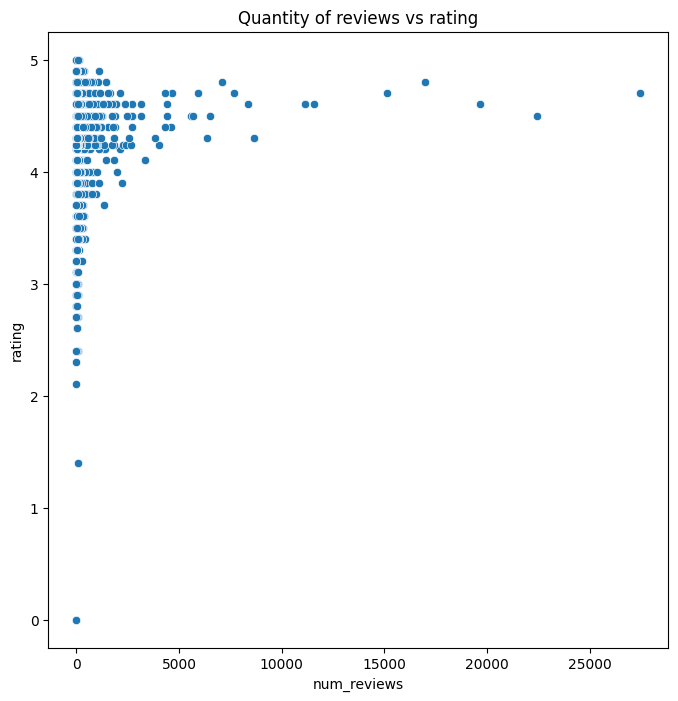

In [21]:
df_sorted = df_udemy.sort_values('rating')
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_sorted, x='num_reviews', y='rating')
plt.title('Quantity of reviews vs rating')
plt.show()

# 20 Creating a wordcloud using the courses name

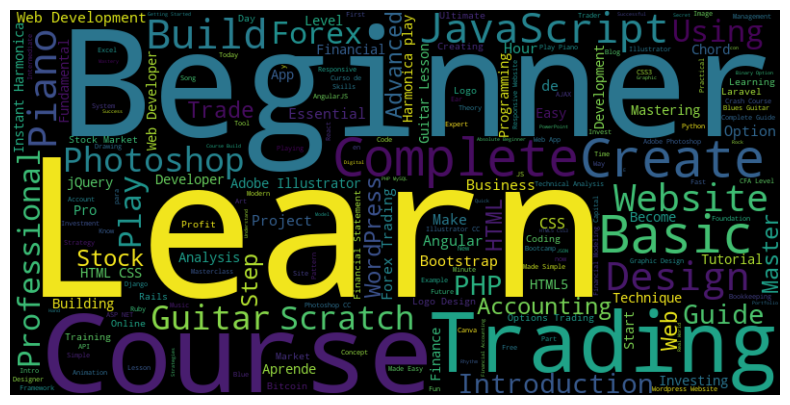

In [22]:
# Joinig all the course titles
titles = ' '.join(df_udemy['course_title'])

# Making a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles)

# Showing the wordcloud of course titles
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 21 Creating a function to detect the language of a text

In [23]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'Unknown'

# 22 Filling the missing values in Language column , using the text in title column

In [24]:
for i, row in df_udemy.iterrows():
    if row['language'] == 'NoData':
        lang = detect_language(row['course_title'])
        df_udemy.loc[i, 'language'] = lang

# 24 Creating a dictionary to map the languages , because they were abbreviated

In [25]:
language_mapping = {
    "es": "Spanish",
    "Español": "Spanish",
    "en": "English",
    "Português": "Portuguese",
    "pt": "Portuguese",
    "Deutsch": "German",
    "de": "German",
    "Français": "French",
    "fr": "French",
    "日本語": "Japanese",
    "id": "Indonesian",
    "it": "Italian",
    "Italiano": "Italian",
    "ca": "Catalan",
    "tl": "Tagalog",
    "no": "Norwegian",
    "Arabic": "Arabic",
    "ar": "Arabic",
    "da": "Danish",
    "ro": "Romanian",
    "nl": "Dutch",
    "et": "Estonian",
    "Türkçe": "Turkish",
    "русский": "Russian",
    "zh-cn": "Chinese",
    "简体中文": "Chinese",
    "한국어": "Korean",
    "ja": "Japanese",
    "sv": "Swedish",
    "af": "Afrikaans",
    "th": "Thai",
    "Hindi": "Hindi",
    "tr": "Turkish",
    "pl": "Polish",
    "so": "Somalian",
    "Urdu": "Urdu"}

# 25 Using the dictionary created in step before , to get the language column finished correctly

In [26]:
df_udemy['language'] = df_udemy['language'].replace(language_mapping)

# 26 Looking all the values in all the columns to be sure if they are in the way we need them

In [27]:
print("Duplicated Values in the Udemy Data: " + str(df_udemy.duplicated().sum()))
print("\n")

for i in range(len(df_udemy.columns)):
    print("Column: " + str(df_udemy.columns[i]) + " , " + " Quantity of values: " +str(df_udemy[df_udemy.columns[i]].count()) + " , " + " Quantity of empty values: " +str(df_udemy[df_udemy.columns[i]].isnull().sum()))
    print("\t")

Duplicated Values in the Udemy Data: 0


Column: course_id ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: course_title ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: is_paid ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: price ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: num_subscribers ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: num_reviews ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: num_lectures ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: level ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: content_duration ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: published_timestamp ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: subject ,  Quantity of values: 3672 ,  Quantity of empty values: 0
	
Column: language ,  Quantity of values: 3672 ,  Quantity of empty value

In [28]:
df_udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,rating
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603,4.234614
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830,0.358326
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000,4.200000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000,4.234614
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000,4.400000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,5.000000


# Extracting only the date part of our published_timestamp column

In [29]:
df_udemy['published_timestamp'] = df_udemy['published_timestamp'].dt.date

# 27 Creating a new CSV file with the final data

In [30]:
#df_udemy.to_csv('udemy_completed.csv', index=False)